In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("Mall_Customers.csv")

#Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.shape

(200, 5)

In [7]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
wcss = []         # wcss stands for within-cluster sum of squares.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

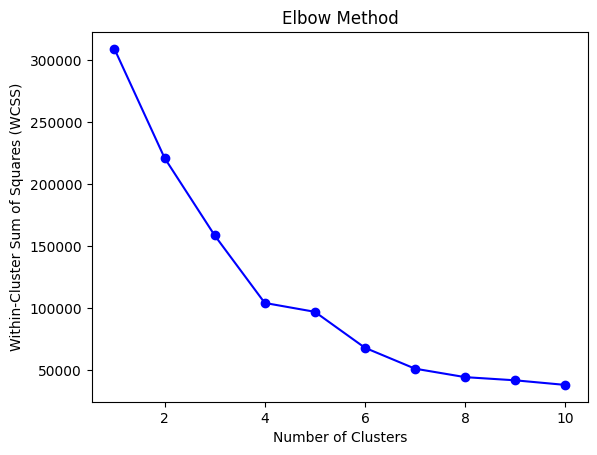

In [10]:
plt.plot(range(1, 11), wcss, marker="o", color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

In [12]:
data['Cluster'] = clusters

<ipython-input-13-e19c4695b9c7>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],


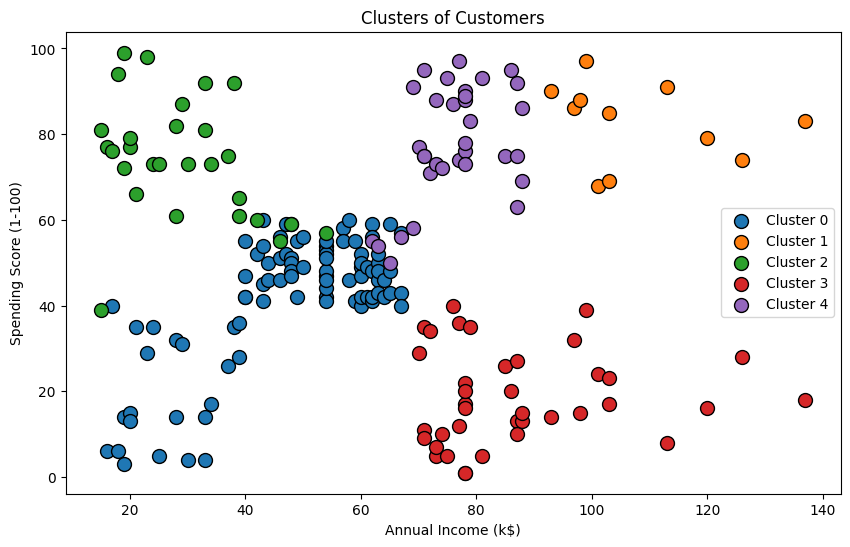

In [13]:
plt.figure(figsize=(10, 6))

for cluster_num in range(5):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster_num}', cmap='viridis', marker='o', edgecolors='black', s=100)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:

age = float(input("Enter customer's age: "))
income = float(input("Enter customer's annual income (in k$): "))
spending_score = float(input("Enter customer's spending score (1-100): "))

user_data = pd.DataFrame({'Age': [age], 'Annual Income (k$)': [income], 'Spending Score (1-100)': [spending_score]})

user_cluster = kmeans.predict(user_data)[0]
print("The user's data belongs to Cluster:", user_cluster)

Enter customer's age: 20
Enter customer's annual income (in k$): 50000
Enter customer's spending score (1-100): 40
The user's data belongs to Cluster: 1
